In [11]:
from model.EfficientNet import EfficientNet
from model.Mango import Mango
import torch
import torchvision.transforms as transforms
from torch.optim import Adam, SGD
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

TRAIN_DIR = "./data/C1-P1_Train/"
TRAIN_CSV = "./data/train.csv"
DEV_DIR = "./data/C1-P1_Dev/"
DEV_CSV = "./data/dev.csv"
Mango_Class = {'A': 0, 'B': 1, 'C': 2}

# hyper parameters
DEPTH = 2
WIDTH = 1.5
RESOLUTION = 0.5
BS_PER_GPU = 28
NUM_CHANNELS = 3
NUM_CLASSES = 3
NUM_EPOCHS = 100
NUM_ITERS = 100
NUM_TEST_FRE = 1
LR = 0.001
SCH_SETPSIZE = 2
SCH_DECAY = 0.95
IMG_SIZE = int(224 * RESOLUTION)

# DataLoader

In [12]:
class Color:
    def __init__(self, brightness=1, contrast=2):
        self.brightness = brightness
        self.contrast = contrast
        
    def __call__(self, imgs):
        imgs = transforms.functional.adjust_brightness(imgs, self.brightness)
        imgs = transforms.functional.adjust_contrast(imgs, self.contrast)
        return imgs

In [13]:
train_transform = transforms.Compose([
    Color(0.8, 2),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomVerticalFlip(0.5),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.RandomErasing(0.2),
])

test_transform = transforms.Compose([
    Color(0.8, 2),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])

trainset = Mango(TRAIN_CSV, TRAIN_DIR, Mango_Class, train_transform)
testset = Mango(DEV_CSV, DEV_DIR, Mango_Class, test_transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=BS_PER_GPU, shuffle=True, num_workers=6)
testloader = torch.utils.data.DataLoader(testset, batch_size=BS_PER_GPU, shuffle=True, num_workers=6)

# Model

In [4]:
model = EfficientNet(DEPTH, WIDTH, NUM_CHANNELS, dropout=0.2, classes=NUM_CLASSES).cuda()
# model.apply(model.weights_init_uniform_rule)
model.load_state_dict(torch.load('./model/weights/Efficient_'+ str(DEPTH) + str(WIDTH) + '.pkl'))

loss_fn = torch.nn.CrossEntropyLoss()
optim = SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optim, SCH_SETPSIZE, SCH_DECAY)

# Training

[  1/100] iter:  100   loss: 47.166240   WAR: 79.64%
[  1/100] iter:  200   loss: 46.614355   WAR: 79.32%
[Testing] loss: 13.724613   WAR: 80.94%


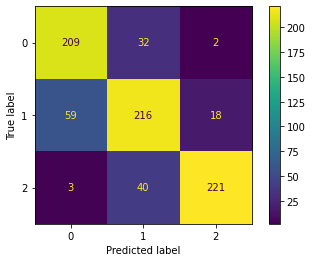

[  2/100] iter:  100   loss: 44.589604   WAR: 80.50%
[  2/100] iter:  200   loss: 49.155936   WAR: 79.41%
[Testing] loss: 13.687598   WAR: 80.02%


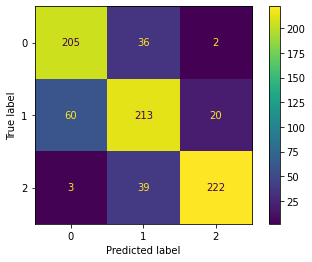

[  3/100] iter:  100   loss: 46.668467   WAR: 80.11%
[  3/100] iter:  200   loss: 48.399745   WAR: 79.86%
[Testing] loss: 13.736186   WAR: 80.73%


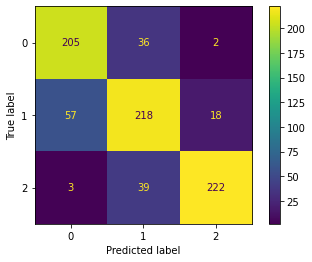

[  4/100] iter:  100   loss: 47.837486   WAR: 80.04%
[  4/100] iter:  200   loss: 45.566027   WAR: 79.73%
[Testing] loss: 13.731251   WAR: 80.14%


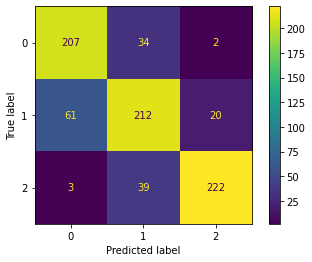

[  5/100] iter:  100   loss: 47.103114   WAR: 79.14%
[  5/100] iter:  200   loss: 46.289766   WAR: 79.68%
[Testing] loss: 13.792988   WAR: 80.17%


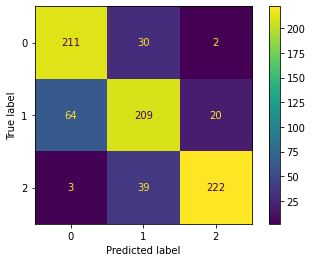

[  6/100] iter:  100   loss: 47.144549   WAR: 79.54%
[  6/100] iter:  200   loss: 45.321273   WAR: 79.86%
[Testing] loss: 13.711388   WAR: 80.54%


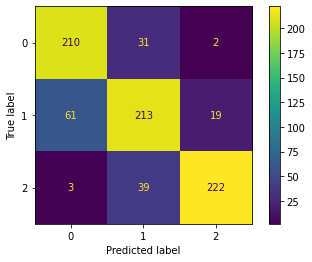

[  7/100] iter:  100   loss: 47.150893   WAR: 78.96%
[  7/100] iter:  200   loss: 46.346099   WAR: 79.20%
[Testing] loss: 13.831413   WAR: 80.94%


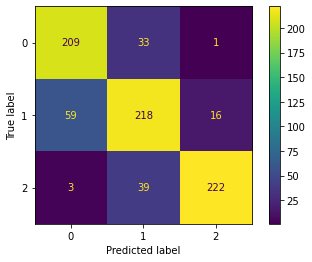

[  8/100] iter:  100   loss: 44.895194   WAR: 80.89%
[  8/100] iter:  200   loss: 48.018993   WAR: 79.98%
[Testing] loss: 13.702941   WAR: 80.70%


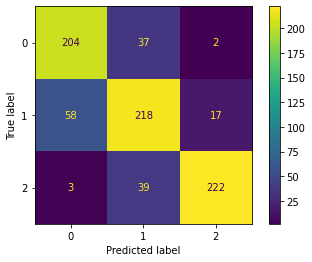

[  9/100] iter:  100   loss: 46.222018   WAR: 80.04%
[  9/100] iter:  200   loss: 47.974148   WAR: 79.29%
[Testing] loss: 13.917713   WAR: 80.42%


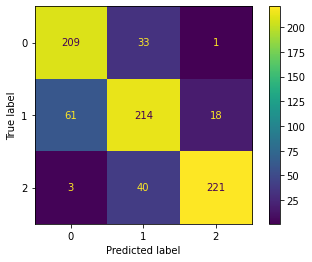

[ 10/100] iter:  100   loss: 46.805501   WAR: 80.07%
[ 10/100] iter:  200   loss: 47.314631   WAR: 80.16%
[Testing] loss: 13.701304   WAR: 80.79%


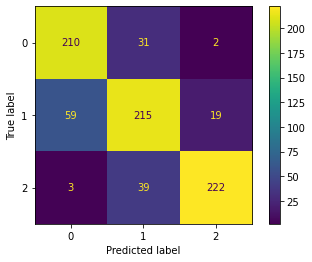

[ 11/100] iter:  100   loss: 45.760326   WAR: 79.71%
[ 11/100] iter:  200   loss: 47.263461   WAR: 79.45%
[Testing] loss: 13.646258   WAR: 80.73%


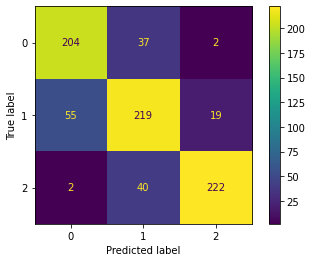

[ 12/100] iter:  100   loss: 46.675699   WAR: 79.32%
[ 12/100] iter:  200   loss: 46.772393   WAR: 79.46%
[Testing] loss: 13.747370   WAR: 80.94%


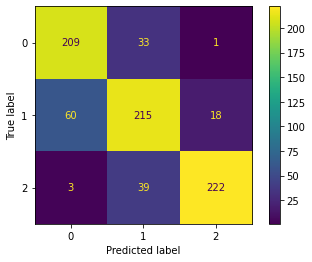

[ 13/100] iter:  100   loss: 47.177170   WAR: 80.18%
[ 13/100] iter:  200   loss: 47.859347   WAR: 79.54%
[Testing] loss: 13.764823   WAR: 80.73%


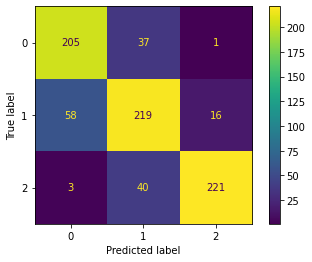

[ 14/100] iter:  100   loss: 47.465202   WAR: 79.11%
[ 14/100] iter:  200   loss: 45.507318   WAR: 79.25%
[Testing] loss: 13.647244   WAR: 80.63%


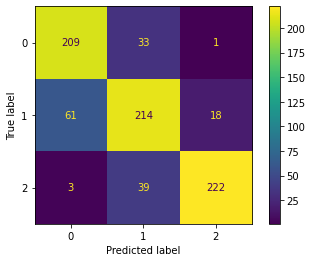

[ 15/100] iter:  100   loss: 46.172728   WAR: 80.18%
[ 15/100] iter:  200   loss: 46.162869   WAR: 80.39%
[Testing] loss: 13.840349   WAR: 80.36%


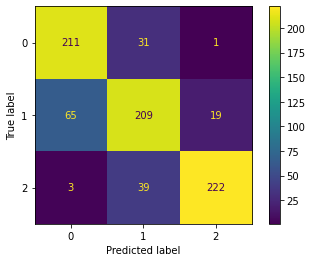

[ 16/100] iter:  100   loss: 47.512285   WAR: 79.00%
[ 16/100] iter:  200   loss: 46.583951   WAR: 79.54%
[Testing] loss: 13.701426   WAR: 80.70%


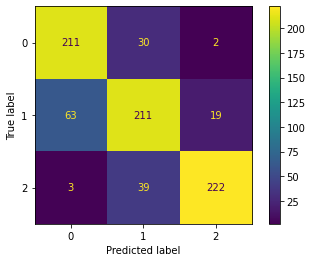

[ 17/100] iter:  100   loss: 48.047620   WAR: 79.00%
[ 17/100] iter:  200   loss: 45.139278   WAR: 79.46%
[Testing] loss: 13.815114   WAR: 80.76%


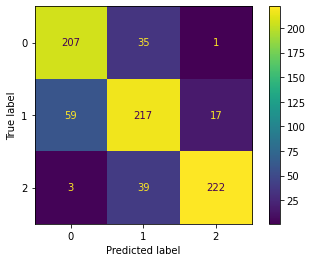

[ 18/100] iter:  100   loss: 47.048384   WAR: 79.46%
[ 18/100] iter:  200   loss: 47.526633   WAR: 79.41%
[Testing] loss: 13.842414   WAR: 80.63%


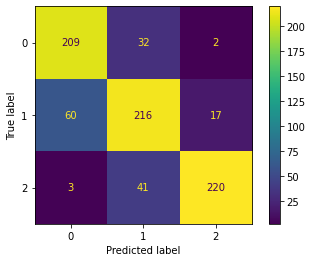

[ 19/100] iter:  100   loss: 47.738755   WAR: 79.04%
[ 19/100] iter:  200   loss: 46.734400   WAR: 79.73%
[Testing] loss: 13.732608   WAR: 80.26%


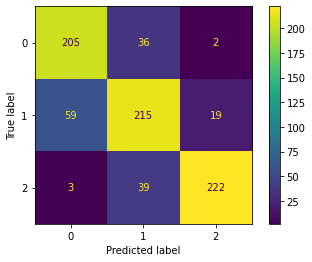

[ 20/100] iter:  100   loss: 47.213611   WAR: 79.46%
[ 20/100] iter:  200   loss: 47.142391   WAR: 79.11%
[Testing] loss: 13.826117   WAR: 80.67%


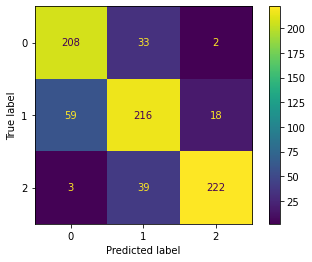

[ 21/100] iter:  100   loss: 47.922963   WAR: 79.54%
[ 21/100] iter:  200   loss: 44.724456   WAR: 79.88%
[Testing] loss: 13.720199   WAR: 80.60%


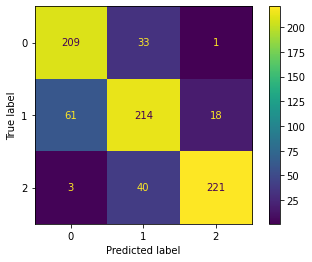

[ 22/100] iter:  100   loss: 46.510746   WAR: 80.18%
[ 22/100] iter:  200   loss: 47.921749   WAR: 79.21%
[Testing] loss: 13.823237   WAR: 80.67%


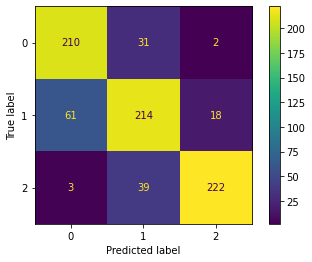

[ 23/100] iter:  100   loss: 46.521885   WAR: 80.25%
[ 23/100] iter:  200   loss: 46.849315   WAR: 80.07%
[Testing] loss: 13.701394   WAR: 80.82%


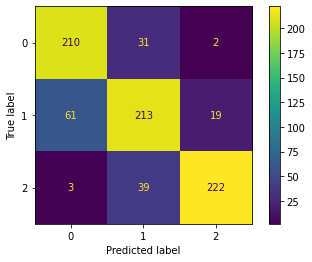

[ 24/100] iter:  100   loss: 45.987081   WAR: 79.93%
[ 24/100] iter:  200   loss: 46.941968   WAR: 79.82%
[Testing] loss: 13.786477   WAR: 80.63%


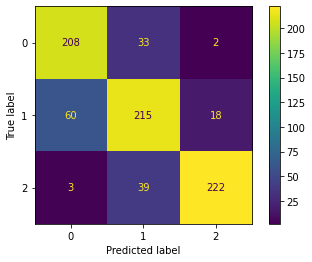

[ 25/100] iter:  100   loss: 45.442343   WAR: 79.54%
[ 25/100] iter:  200   loss: 47.881945   WAR: 79.12%
[Testing] loss: 13.726631   WAR: 80.79%


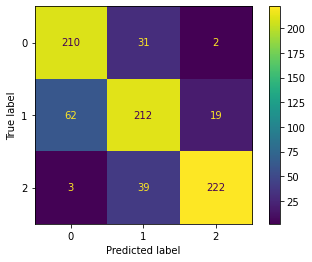

[ 26/100] iter:  100   loss: 46.465736   WAR: 80.29%
[ 26/100] iter:  200   loss: 47.301964   WAR: 79.91%
[Testing] loss: 13.753008   WAR: 80.48%


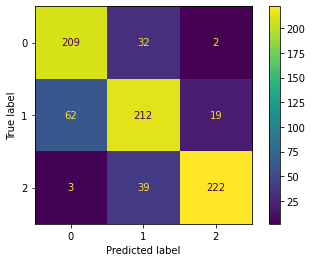

[ 27/100] iter:  100   loss: 47.499935   WAR: 79.14%
[ 27/100] iter:  200   loss: 47.695045   WAR: 79.04%
[Testing] loss: 13.892692   WAR: 80.51%


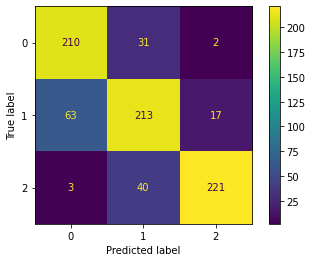

[ 28/100] iter:  100   loss: 45.000758   WAR: 80.79%
[ 28/100] iter:  200   loss: 46.283624   WAR: 80.09%
[Testing] loss: 13.802400   WAR: 80.54%


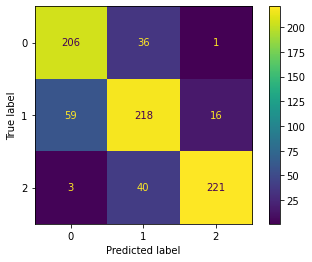

[ 29/100] iter:  100   loss: 47.845593   WAR: 79.43%
[ 29/100] iter:  200   loss: 46.467691   WAR: 79.64%
[Testing] loss: 13.750370   WAR: 80.51%


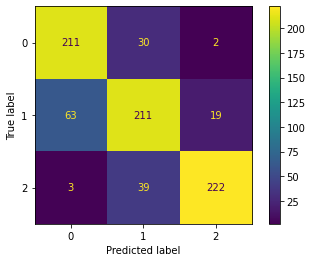

[ 30/100] iter:  100   loss: 47.189163   WAR: 79.39%
[ 30/100] iter:  200   loss: 45.788313   WAR: 79.75%
[Testing] loss: 13.575227   WAR: 80.79%


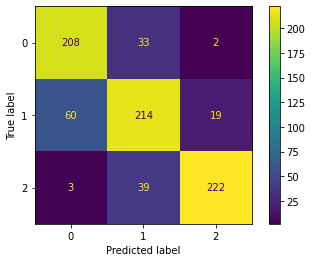

[ 31/100] iter:  100   loss: 45.407191   WAR: 80.29%
[ 31/100] iter:  200   loss: 47.181173   WAR: 79.89%
[Testing] loss: 13.798281   WAR: 80.39%


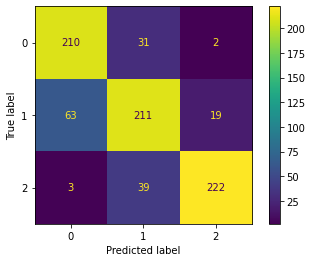

[ 32/100] iter:  100   loss: 46.079213   WAR: 79.61%
[ 32/100] iter:  200   loss: 47.275670   WAR: 79.45%
[Testing] loss: 13.702299   WAR: 80.39%


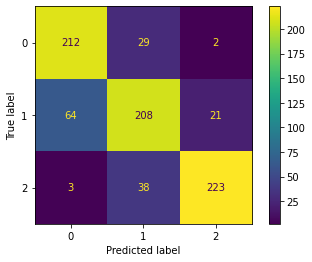

[ 33/100] iter:  100   loss: 46.586535   WAR: 80.25%
[ 33/100] iter:  200   loss: 47.582094   WAR: 79.88%
[Testing] loss: 13.842037   WAR: 80.54%


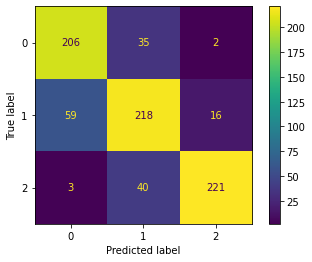

[ 34/100] iter:  100   loss: 46.433111   WAR: 79.79%
[ 34/100] iter:  200   loss: 46.611375   WAR: 79.75%
[Testing] loss: 13.750156   WAR: 80.20%


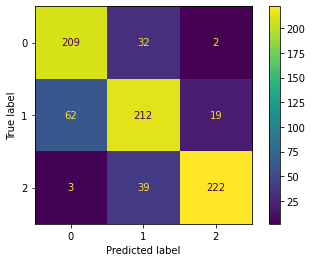

[ 35/100] iter:  100   loss: 46.124163   WAR: 79.64%
[ 35/100] iter:  200   loss: 46.138877   WAR: 79.79%
[Testing] loss: 13.836327   WAR: 80.76%


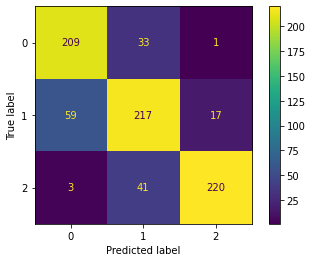

[ 36/100] iter:  100   loss: 47.997949   WAR: 78.50%
[ 36/100] iter:  200   loss: 45.724540   WAR: 79.18%
[Testing] loss: 13.735918   WAR: 80.85%


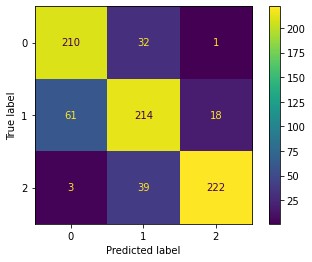

[ 37/100] iter:  100   loss: 47.793298   WAR: 79.00%
[ 37/100] iter:  200   loss: 46.323158   WAR: 79.62%
[Testing] loss: 13.774362   WAR: 80.11%


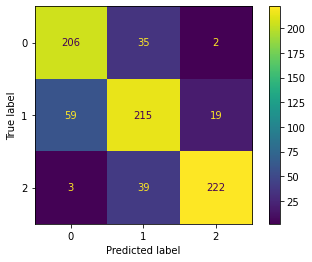

[ 38/100] iter:  100   loss: 46.640578   WAR: 79.50%
[ 38/100] iter:  200   loss: 45.328101   WAR: 79.89%
[Testing] loss: 13.847785   WAR: 80.51%


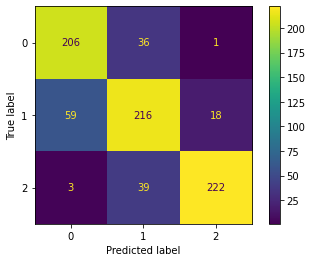

[ 39/100] iter:  100   loss: 44.283189   WAR: 80.75%
[ 39/100] iter:  200   loss: 48.108708   WAR: 79.75%
[Testing] loss: 13.871578   WAR: 80.33%


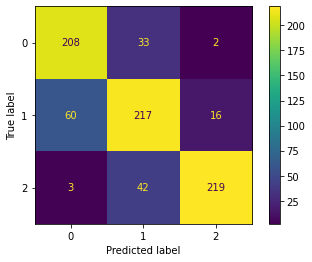

[ 40/100] iter:  100   loss: 44.837799   WAR: 80.46%
[ 40/100] iter:  200   loss: 47.130969   WAR: 80.07%
[Testing] loss: 13.726400   WAR: 80.42%


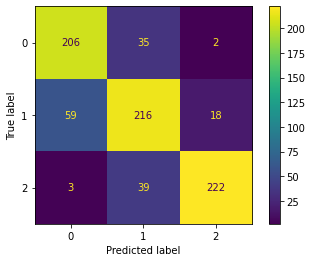

[ 41/100] iter:  100   loss: 47.202111   WAR: 80.11%
[ 41/100] iter:  200   loss: 44.835031   WAR: 80.32%
[Testing] loss: 13.865981   WAR: 80.88%


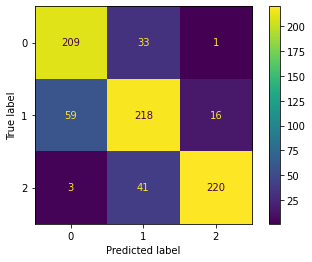

[ 42/100] iter:  100   loss: 46.704036   WAR: 79.82%
[ 42/100] iter:  200   loss: 47.369538   WAR: 79.95%
[Testing] loss: 13.941799   WAR: 79.99%


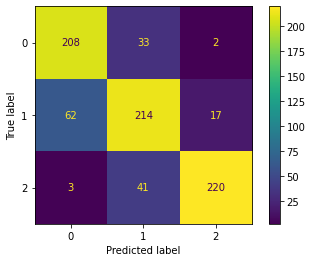

[ 43/100] iter:  100   loss: 44.282068   WAR: 81.50%
[ 43/100] iter:  200   loss: 46.829458   WAR: 80.54%
[Testing] loss: 13.894138   WAR: 80.36%


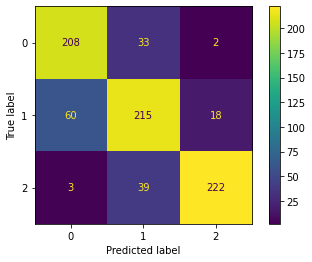

[ 44/100] iter:  100   loss: 46.334731   WAR: 79.25%
[ 44/100] iter:  200   loss: 47.352400   WAR: 79.66%
[Testing] loss: 13.900012   WAR: 80.42%


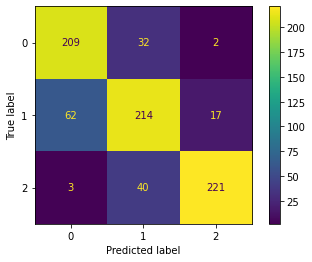

[ 45/100] iter:  100   loss: 47.418959   WAR: 78.39%
[ 45/100] iter:  200   loss: 47.126670   WAR: 79.09%
[Testing] loss: 13.702268   WAR: 80.73%


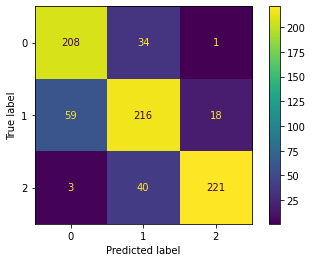

[ 46/100] iter:  100   loss: 46.484926   WAR: 79.07%
[ 46/100] iter:  200   loss: 47.709794   WAR: 79.23%
[Testing] loss: 13.833393   WAR: 80.08%


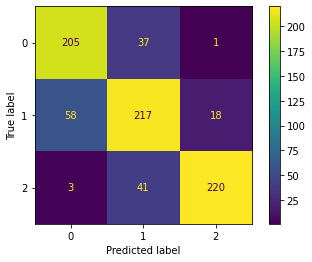

[ 47/100] iter:  100   loss: 46.704243   WAR: 80.32%
[ 47/100] iter:  200   loss: 46.530790   WAR: 79.64%
[Testing] loss: 13.798523   WAR: 80.51%


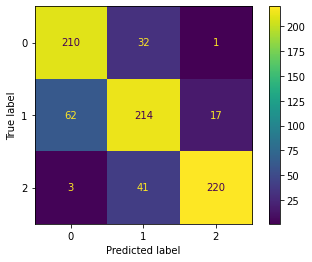

[ 48/100] iter:  100   loss: 47.875765   WAR: 79.68%
[ 48/100] iter:  200   loss: 45.552827   WAR: 80.11%
[Testing] loss: 13.721636   WAR: 80.73%


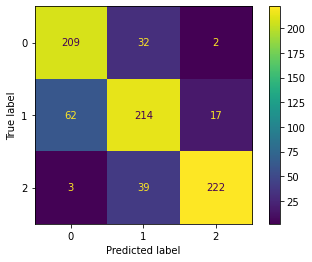

[ 49/100] iter:  100   loss: 46.618754   WAR: 79.04%
[ 49/100] iter:  200   loss: 46.038938   WAR: 79.48%
[Testing] loss: 13.803307   WAR: 80.42%


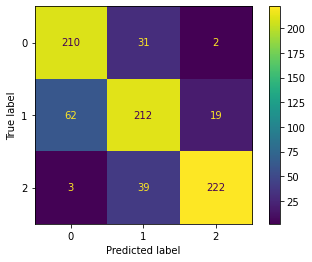

[ 50/100] iter:  100   loss: 46.344943   WAR: 80.00%
[ 50/100] iter:  200   loss: 45.672197   WAR: 80.11%
[Testing] loss: 13.711067   WAR: 80.60%


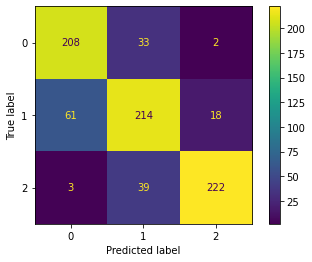

[ 51/100] iter:  100   loss: 46.972863   WAR: 79.75%
[ 51/100] iter:  200   loss: 44.529997   WAR: 80.25%
[Testing] loss: 13.759109   WAR: 80.42%


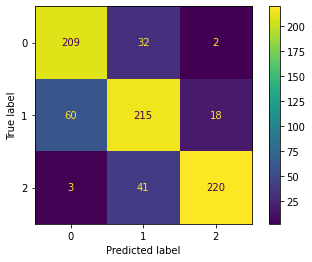

[ 52/100] iter:  100   loss: 47.504536   WAR: 79.75%
[ 52/100] iter:  200   loss: 45.113998   WAR: 80.29%
[Testing] loss: 13.770305   WAR: 80.23%


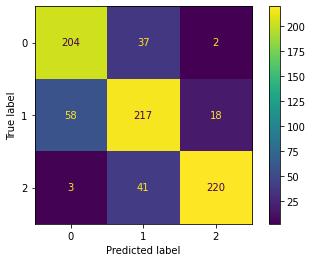

[ 53/100] iter:  100   loss: 44.105316   WAR: 81.00%
[ 53/100] iter:  200   loss: 48.752506   WAR: 79.61%
[Testing] loss: 13.748156   WAR: 80.60%


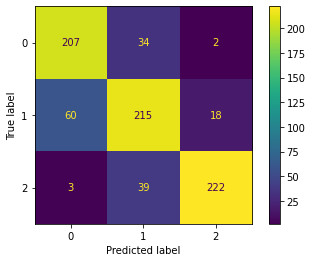

[ 54/100] iter:  100   loss: 46.224148   WAR: 79.46%
[ 54/100] iter:  200   loss: 46.928994   WAR: 79.96%
[Testing] loss: 13.938002   WAR: 80.57%


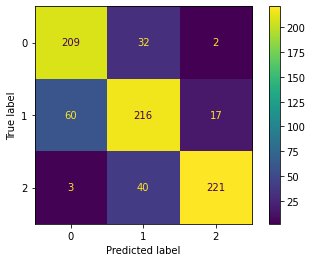

[ 55/100] iter:  100   loss: 46.892856   WAR: 80.43%
[ 55/100] iter:  200   loss: 46.261593   WAR: 80.13%
[Testing] loss: 13.750610   WAR: 80.70%


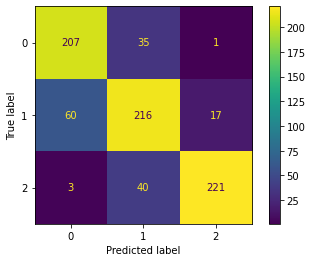

[ 56/100] iter:  100   loss: 45.867032   WAR: 79.93%
[ 56/100] iter:  200   loss: 47.684851   WAR: 79.54%
[Testing] loss: 13.733035   WAR: 80.70%


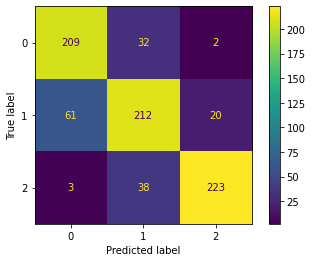

[ 57/100] iter:  100   loss: 47.940920   WAR: 78.89%
[ 57/100] iter:  200   loss: 46.568461   WAR: 79.21%
[Testing] loss: 13.823837   WAR: 80.20%


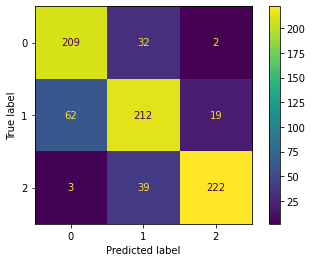

[ 58/100] iter:  100   loss: 45.214258   WAR: 80.11%
[ 58/100] iter:  200   loss: 45.493682   WAR: 79.98%
[Testing] loss: 13.585934   WAR: 81.03%


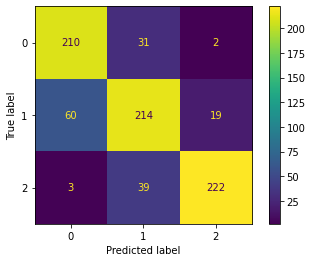

[ 59/100] iter:  100   loss: 46.234217   WAR: 79.68%
[ 59/100] iter:  200   loss: 46.287788   WAR: 79.84%
[Testing] loss: 13.711123   WAR: 80.26%


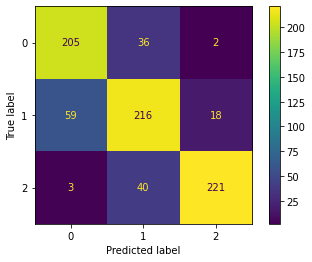

[ 60/100] iter:  100   loss: 45.496587   WAR: 80.14%
[ 60/100] iter:  200   loss: 46.689726   WAR: 79.98%
[Testing] loss: 13.741733   WAR: 80.36%


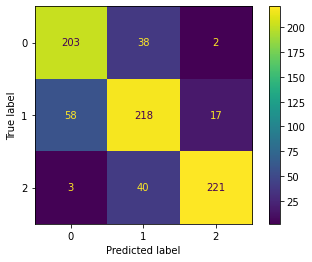

[ 61/100] iter:  100   loss: 46.703930   WAR: 80.14%
[ 61/100] iter:  200   loss: 46.645920   WAR: 80.02%
[Testing] loss: 13.743568   WAR: 80.73%


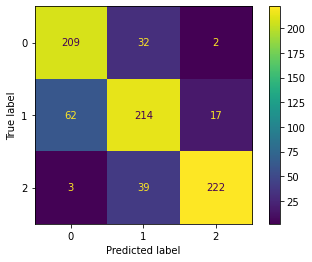

[ 62/100] iter:  100   loss: 47.385281   WAR: 79.14%
[ 62/100] iter:  200   loss: 44.826046   WAR: 80.29%
[Testing] loss: 13.815349   WAR: 80.85%


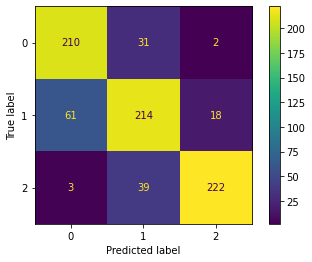

[ 63/100] iter:  100   loss: 45.325885   WAR: 80.07%
[ 63/100] iter:  200   loss: 48.580293   WAR: 79.46%
[Testing] loss: 13.708901   WAR: 80.73%


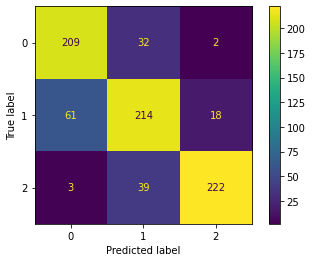

[ 64/100] iter:  100   loss: 43.978100   WAR: 81.07%
[ 64/100] iter:  200   loss: 45.783230   WAR: 80.82%
[Testing] loss: 13.832070   WAR: 80.33%


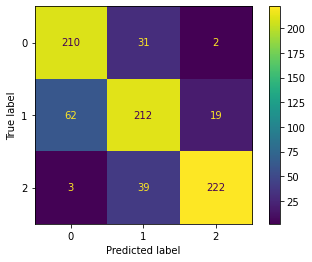

[ 65/100] iter:  100   loss: 46.958800   WAR: 78.82%
[ 65/100] iter:  200   loss: 45.489202   WAR: 79.46%
[Testing] loss: 13.832612   WAR: 80.30%


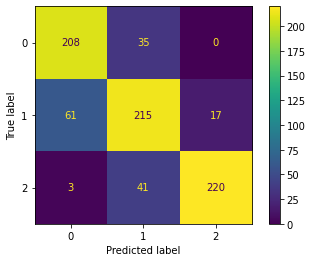

[ 66/100] iter:  100   loss: 46.727842   WAR: 79.79%
[ 66/100] iter:  200   loss: 45.853911   WAR: 80.00%
[Testing] loss: 13.831126   WAR: 80.42%


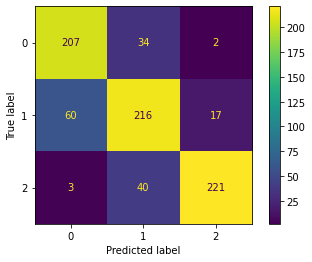

[ 67/100] iter:  100   loss: 45.677249   WAR: 80.04%
[ 67/100] iter:  200   loss: 46.292105   WAR: 80.00%
[Testing] loss: 13.744844   WAR: 80.26%


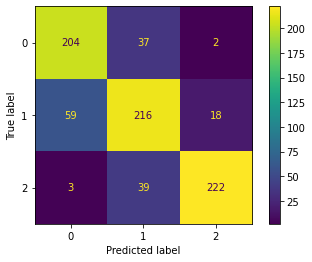

[ 68/100] iter:  100   loss: 46.131897   WAR: 80.82%
[ 68/100] iter:  200   loss: 46.398258   WAR: 80.14%
[Testing] loss: 13.627264   WAR: 80.94%


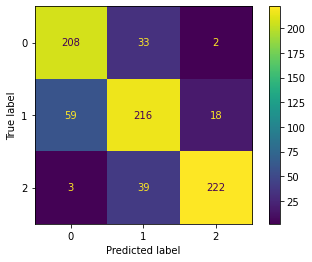

[ 69/100] iter:  100   loss: 45.417375   WAR: 80.07%
[ 69/100] iter:  200   loss: 47.040004   WAR: 79.96%
[Testing] loss: 13.732017   WAR: 80.51%


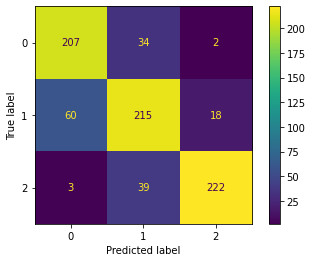

[ 70/100] iter:  100   loss: 46.422896   WAR: 79.25%
[ 70/100] iter:  200   loss: 45.192813   WAR: 79.84%
[Testing] loss: 13.781970   WAR: 80.30%


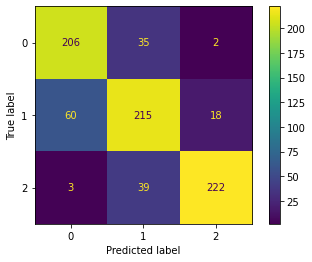

[ 71/100] iter:  100   loss: 46.674502   WAR: 79.50%
[ 71/100] iter:  200   loss: 45.966619   WAR: 79.48%
[Testing] loss: 13.828898   WAR: 80.08%


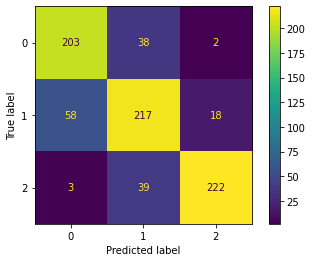

[ 72/100] iter:  100   loss: 46.598572   WAR: 79.71%
[ 72/100] iter:  200   loss: 45.009433   WAR: 79.96%
[Testing] loss: 13.745163   WAR: 80.14%


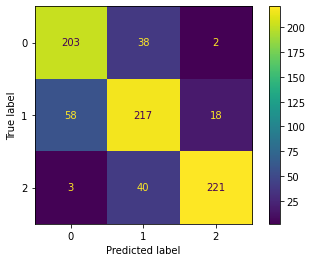

[ 73/100] iter:  100   loss: 47.611947   WAR: 79.00%
[ 73/100] iter:  200   loss: 44.332881   WAR: 79.68%
[Testing] loss: 13.808621   WAR: 80.60%


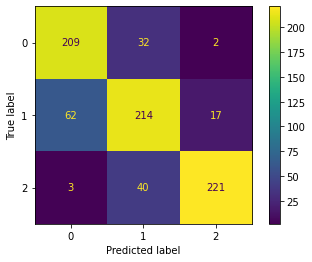

[ 74/100] iter:  100   loss: 46.495879   WAR: 79.82%
[ 74/100] iter:  200   loss: 45.528813   WAR: 80.23%
[Testing] loss: 13.748302   WAR: 80.39%


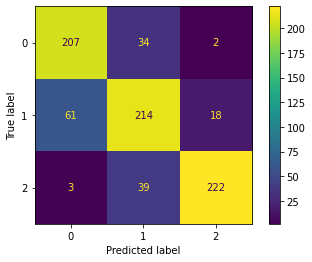

[ 75/100] iter:  100   loss: 45.675996   WAR: 80.00%
[ 75/100] iter:  200   loss: 46.213833   WAR: 79.73%
[Testing] loss: 13.659129   WAR: 80.39%


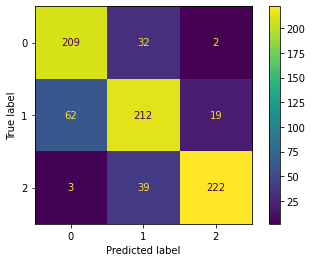

[ 76/100] iter:  100   loss: 46.592363   WAR: 79.75%
[ 76/100] iter:  200   loss: 45.975097   WAR: 79.79%
[Testing] loss: 14.051455   WAR: 79.96%


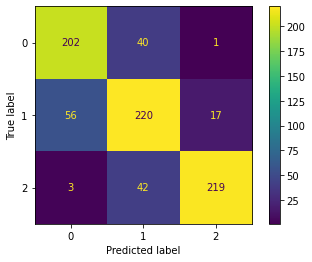

[ 77/100] iter:  100   loss: 47.806480   WAR: 78.64%
[ 77/100] iter:  200   loss: 45.417524   WAR: 79.61%
[Testing] loss: 13.693479   WAR: 80.33%


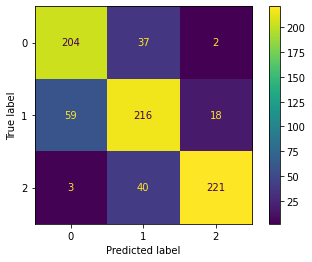

[ 78/100] iter:  100   loss: 46.029720   WAR: 80.29%
[ 78/100] iter:  200   loss: 47.409580   WAR: 79.71%
[Testing] loss: 13.895164   WAR: 80.20%


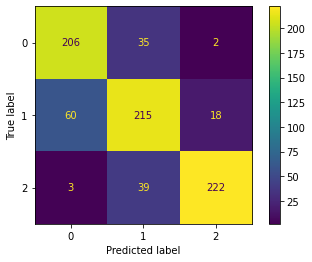

[ 79/100] iter:  100   loss: 44.496698   WAR: 80.82%
[ 79/100] iter:  200   loss: 45.681202   WAR: 80.55%
[Testing] loss: 13.697559   WAR: 80.36%


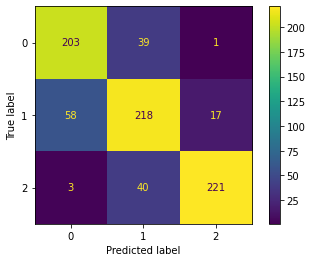

[ 80/100] iter:  100   loss: 45.649416   WAR: 79.96%
[ 80/100] iter:  200   loss: 46.200729   WAR: 79.93%
[Testing] loss: 13.701911   WAR: 80.60%


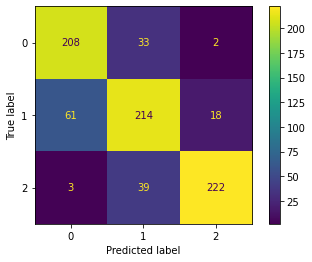

[ 81/100] iter:  100   loss: 45.332910   WAR: 80.11%
[ 81/100] iter:  200   loss: 45.597979   WAR: 80.36%
[Testing] loss: 13.849983   WAR: 80.51%


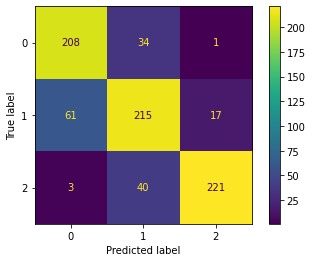

[ 82/100] iter:  100   loss: 44.622453   WAR: 81.04%
[ 82/100] iter:  200   loss: 47.646904   WAR: 79.82%
[Testing] loss: 13.641061   WAR: 80.42%


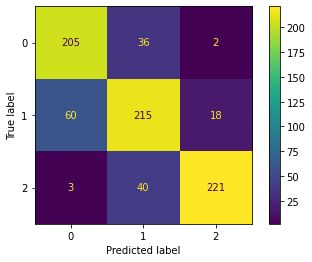

[ 83/100] iter:  100   loss: 46.752475   WAR: 79.82%
[ 83/100] iter:  200   loss: 46.232154   WAR: 79.77%
[Testing] loss: 13.946570   WAR: 80.20%


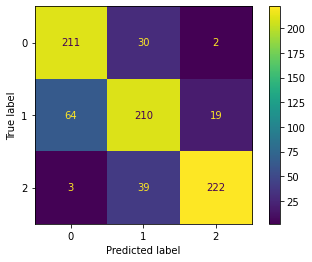

[ 84/100] iter:  100   loss: 45.684693   WAR: 80.36%
[ 84/100] iter:  200   loss: 47.645134   WAR: 79.61%
[Testing] loss: 13.728780   WAR: 80.23%


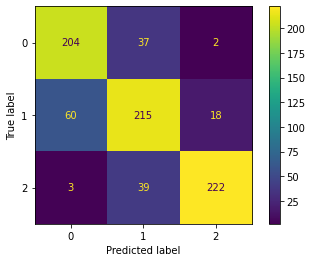

[ 85/100] iter:  100   loss: 47.533280   WAR: 79.75%
[ 85/100] iter:  200   loss: 44.513205   WAR: 80.21%
[Testing] loss: 13.703819   WAR: 80.57%


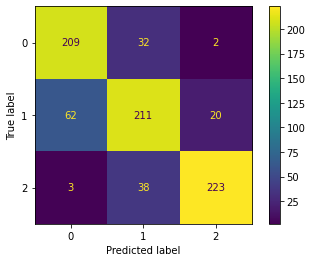

[ 86/100] iter:  100   loss: 45.255248   WAR: 80.36%
[ 86/100] iter:  200   loss: 46.324460   WAR: 80.09%
[Testing] loss: 13.984562   WAR: 79.80%


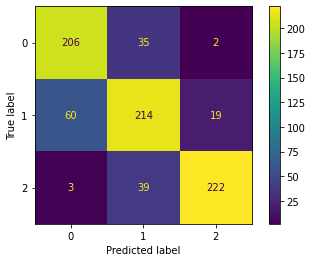

[ 87/100] iter:  100   loss: 45.563034   WAR: 80.07%
[ 87/100] iter:  200   loss: 46.332876   WAR: 79.86%
[Testing] loss: 13.670664   WAR: 80.42%


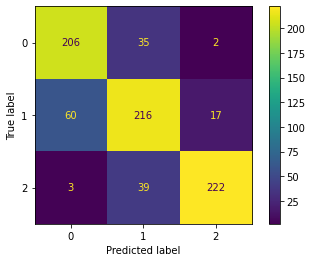

[ 88/100] iter:  100   loss: 47.112506   WAR: 79.43%
[ 88/100] iter:  200   loss: 44.702799   WAR: 79.75%
[Testing] loss: 13.797588   WAR: 80.26%


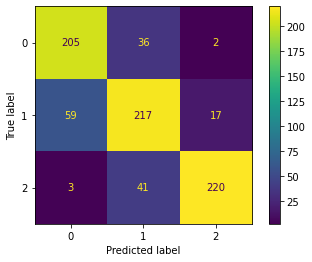

[ 89/100] iter:  100   loss: 44.481456   WAR: 81.29%
[ 89/100] iter:  200   loss: 48.024662   WAR: 80.05%
[Testing] loss: 13.661201   WAR: 80.70%


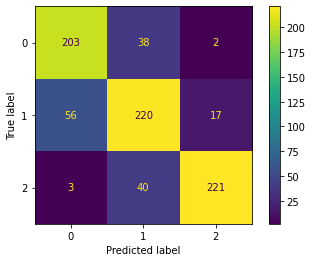

[ 90/100] iter:  100   loss: 46.046046   WAR: 80.36%
[ 90/100] iter:  200   loss: 46.273575   WAR: 79.91%
[Testing] loss: 13.824554   WAR: 80.30%


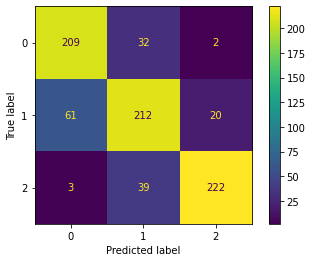

[ 91/100] iter:  100   loss: 47.239859   WAR: 79.32%
[ 91/100] iter:  200   loss: 44.555683   WAR: 80.20%
[Testing] loss: 13.714367   WAR: 80.36%


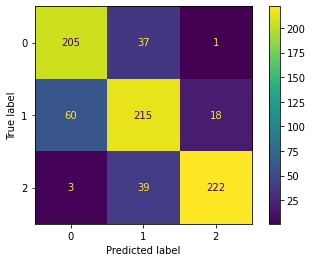

[ 92/100] iter:  100   loss: 45.819597   WAR: 79.82%
[ 92/100] iter:  200   loss: 46.395631   WAR: 79.91%
[Testing] loss: 13.836889   WAR: 80.33%


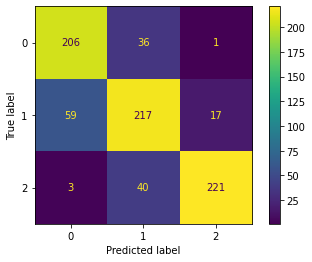

[ 93/100] iter:  100   loss: 46.766088   WAR: 79.61%
[ 93/100] iter:  200   loss: 46.037862   WAR: 79.88%
[Testing] loss: 13.684945   WAR: 80.33%


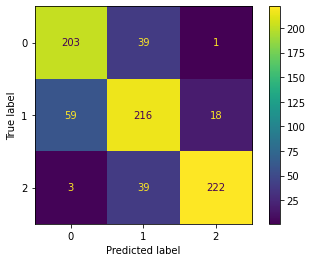

[ 94/100] iter:  100   loss: 45.338128   WAR: 79.39%
[ 94/100] iter:  200   loss: 45.420359   WAR: 79.80%
[Testing] loss: 13.851859   WAR: 80.63%


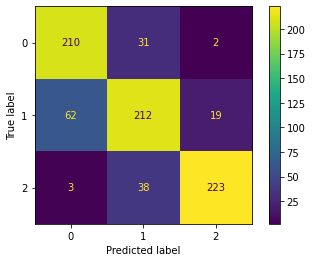

[ 95/100] iter:  100   loss: 46.880085   WAR: 79.82%
[ 95/100] iter:  200   loss: 45.802621   WAR: 79.82%
[Testing] loss: 13.775183   WAR: 80.48%


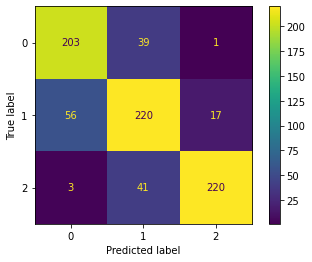

[ 96/100] iter:  100   loss: 45.456171   WAR: 80.96%
[ 96/100] iter:  200   loss: 46.055377   WAR: 80.38%
[Testing] loss: 13.814873   WAR: 80.14%


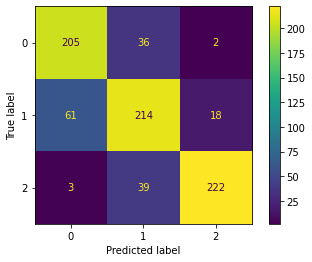

[ 97/100] iter:  100   loss: 46.840032   WAR: 79.82%
[ 97/100] iter:  200   loss: 47.144078   WAR: 80.05%
[Testing] loss: 13.876288   WAR: 79.93%


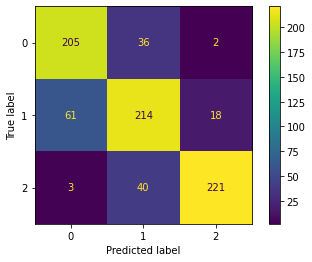

[ 98/100] iter:  100   loss: 47.360099   WAR: 79.71%
[ 98/100] iter:  200   loss: 46.973067   WAR: 79.30%
[Testing] loss: 13.711989   WAR: 80.26%


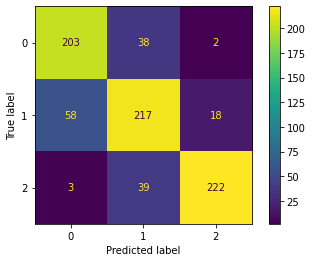

[ 99/100] iter:  100   loss: 44.085767   WAR: 80.18%
[ 99/100] iter:  200   loss: 47.144048   WAR: 79.86%
[Testing] loss: 13.715528   WAR: 80.05%


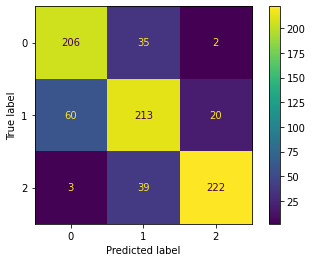

[100/100] iter:  100   loss: 43.989148   WAR: 81.89%
[100/100] iter:  200   loss: 47.547608   WAR: 80.52%
[Testing] loss: 13.706340   WAR: 80.51%


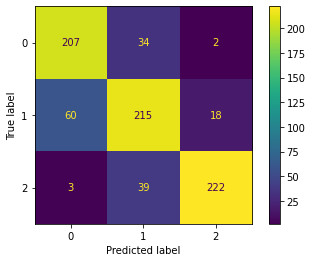

In [5]:
for epoch in range(NUM_EPOCHS):
    """
    Training
    """
    total_loss = 0
    recall = 0
    model.train()
    for i, data in enumerate(trainloader):
        optim.zero_grad()

        imgs, labels = data['data'].cuda(), data['label'].cuda()
        outputs = model(imgs)
        loss = loss_fn(outputs, labels)
        total_loss += loss.item()
        loss.backward()
        optim.step()
        
        predicts = outputs.argmax(dim=1)
        recall += recall_score(labels.cpu(), predicts.cpu(), average='weighted', zero_division=0)
        if(i % NUM_ITERS == NUM_ITERS-1):
            print("[{:3d}/{:3d}] iter: {:4d}   loss: {:.6f}   WAR: {:5.2f}%".
                  format(epoch+1, NUM_EPOCHS, i+1, total_loss, recall/(i+1) * 100))
            total_loss = 0
            
    """
    Testing
    """
    if(epoch % NUM_TEST_FRE == NUM_TEST_FRE-1):
        total_loss = 0
        recall = 0
        model.eval()
        for i , data in enumerate(testloader):            
            imgs, labels = data["data"].cuda(), data["label"].cuda()
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            total_loss += loss.item()
            predicts = torch.argmax(outputs, dim=1)
            recall += recall_score(labels.cpu(), predicts.cpu(), average='weighted', zero_division=0)
            if(i == 0):
                fusion_matrix = confusion_matrix(labels.cpu(), predicts.cpu(), labels=[0, 1, 2])
            else:
                fusion_matrix += confusion_matrix(labels.cpu(), predicts.cpu(), labels=[0, 1, 2])
        
        print("[Testing] loss: {:.6f}   WAR: {:5.2f}%".format(total_loss, recall/(i+1) * 100))
        ConfusionMatrixDisplay(fusion_matrix).plot()
        plt.show()
    scheduler.step()

In [6]:
torch.save(model.state_dict(), './model/weights/Efficient_'+ str(DEPTH) + str(WIDTH) + '.pkl')